# **Курсовая работа по дисциплине «Методология и инструменты анализа данных»**
## «Анализ данных о работе проекта "Умная кафедра" (датчики присутствия сотрудников)»
## Салей Илья Максимович

### Получение данных для анализа

#### Подключение необходимых библиотек

In [358]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

#### Подключение к базе данных

In [359]:
db_host = 'localhost'
db_user = 'root'
db_password = 'root'
db_name = 'homeassistant'

connection_str = f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}"

engine = create_engine(connection_str)

#### Получение данных из таблицы "states" и запись их в объект DataFrame

In [360]:
sql_query = 'SELECT * FROM states'

df = pd.read_sql_query(sql_query, engine)

print(df)

         state_id                                          entity_id  \
0          991389        sensor.wireless_router_archer_c7_b_received   
1          991390            sensor.wireless_router_archer_c7_b_sent   
2          991391  sensor.wireless_router_archer_c7_packets_received   
3          991392      sensor.wireless_router_archer_c7_packets_sent   
4          991393  sensor.wireless_router_archer_c7_packets_s_rec...   
...           ...                                                ...   
9185804  10177193                                            sun.sun   
9185805  10177194                     binary_sensor.rpi_power_status   
9185806  10177195                                            sun.sun   
9185807  10177196                     binary_sensor.rpi_power_status   
9185808  10177197                                            sun.sun   

                 state attributes event_id               last_changed  \
0             88899264       None     None                    

### Предварительный анализ и очистка данных

#### Фильтрация объекта DataFrame для получения информации только с датчиков присутствия

In [361]:
filtered_df = df[df['entity_id'].str.startswith('device_tracker.')]

print(filtered_df)

         state_id                       entity_id     state attributes  \
3250       994639            device_tracker.maxvi      home       None   
3298       994687            device_tracker.maxvi  not_home       None   
3696       995085     device_tracker.redmi_5_plus      home       None   
3740       995129       device_tracker.huawei_p50      home       None   
4018       995407     device_tracker.redmi_5_plus  not_home       None   
...           ...                             ...       ...        ...   
9185755  10177144  device_tracker.desktop_r50gdkb  not_home       None   
9185756  10177145   device_tracker.oneplus_9rt_5g  not_home       None   
9185757  10177146  device_tracker.desktop_o34ts2c  not_home       None   
9185758  10177147          device_tracker.kopchik  not_home       None   
9185759  10177148      device_tracker.honor_10i_5  not_home       None   

        event_id last_changed               last_updated  old_state_id  \
3250        None          NaT 2022-08

#### Очищение отфильтрованного объекта DataFrame от столбцов, содержащих нулевые значения

In [362]:
df_cleaned = filtered_df.dropna(axis=1, how='all')
df_cleaned = df_cleaned.drop(columns=['origin_idx'], axis=1, errors='ignore')

print(df_cleaned)

         state_id                       entity_id     state  \
3250       994639            device_tracker.maxvi      home   
3298       994687            device_tracker.maxvi  not_home   
3696       995085     device_tracker.redmi_5_plus      home   
3740       995129       device_tracker.huawei_p50      home   
4018       995407     device_tracker.redmi_5_plus  not_home   
...           ...                             ...       ...   
9185755  10177144  device_tracker.desktop_r50gdkb  not_home   
9185756  10177145   device_tracker.oneplus_9rt_5g  not_home   
9185757  10177146  device_tracker.desktop_o34ts2c  not_home   
9185758  10177147          device_tracker.kopchik  not_home   
9185759  10177148      device_tracker.honor_10i_5  not_home   

                      last_updated  old_state_id  attributes_id  \
3250    2022-08-29 04:53:41.681824           NaN            107   
3298    2022-08-29 04:56:45.002466      994639.0            107   
3696    2022-08-29 05:23:29.884874        

#### Несколько строк данных получившегося датасета

In [363]:
df_cleaned.head(10)

,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id
3250,994639,device_tracker.maxvi,home,2022-08-29 04:53:41.681824,NaN,107,01GBKZ5FNHE0482FC9EZYGNZYX
3298,994687,device_tracker.maxvi,not_home,2022-08-29 04:56:45.002466,994639.0,107,01GBKZB2PAMBPPR80ADGZAQ0JP
3696,995085,device_tracker.redmi_5_plus,home,2022-08-29 05:23:29.884874,NaN,100,01GBM0W1YWQYFQS2NNFPPZ746N
3740,995129,device_tracker.huawei_p50,home,2022-08-29 05:26:13.702661,NaN,104,01GBM111Y674SH7YFEZGHZZ7V2
4018,995407,device_tracker.redmi_5_plus,not_home,2022-08-29 05:43:45.002384,995085.0,100,01GBM214KAKX5RXDVQ0Q2KQGZF
4019,995408,device_tracker.huawei_p50,not_home,2022-08-29 05:43:45.002905,995129.0,104,01GBM214KAK6WEYRDMD3TED1NE
4020,995409,device_tracker.huawei_p50,home,2022-08-29 05:43:45.592125,995408.0,104,01GBM2155R1P6ZT9X5R4MA5X8Y
4114,995503,device_tracker.huawei_p50,not_home,2022-08-29 05:49:50.002203,995409.0,104,01GBM2C91JX7F44KT2VQ5NW74S
4115,995504,device_tracker.huawei_p50,home,2022-08-29 05:49:50.401482,995503.0,104,01GBM2C9E1Z6Y9C4H149CWQNCS
4345,995734,device_tracker.huawei_p50,not_home,2022-08-29 06:04:50.002258,995504.0,104,01GBM37QYJKAWEGVYNZD2Z0B1K


#### Общая информацию о данных (количество столбцов, количество ненулевых записей, тип данных в столбцах)

In [364]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50728 entries, 3250 to 9185759
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   state_id       50728 non-null  int64         
 1   entity_id      50728 non-null  object        
 2   state          50728 non-null  object        
 3   last_updated   50728 non-null  datetime64[ns]
 4   old_state_id   48579 non-null  float64       
 5   attributes_id  50728 non-null  int64         
 6   context_id     50728 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 3.1+ MB


#### Описательная статистика числовых столбцов (центральная тенденция, дисперсия, форма распределения набора данных)

In [365]:
df_cleaned.describe()

,state_id,old_state_id,attributes_id
count,5.072800e+04,4.857900e+04,50728.000000
mean,4.755080e+06,4.659742e+06,193.944981
std,2.755907e+06,2.703416e+06,141.463216
min,9.946390e+05,9.946390e+05,70.000000
25%,2.260288e+06,2.167954e+06,100.000000
50%,4.512896e+06,4.395937e+06,104.000000
75%,6.928224e+06,6.784650e+06,240.000000
max,1.017715e+07,1.017679e+07,750.000000


#### Список уникальных значений каждого столбца

In [366]:
for column in df_cleaned.columns:
    print(f"Уникальные значения в {column}:\n{df_cleaned[column].unique()}\n")

Уникальные значения в state_id:
[  994639   994687   995085 ... 10177146 10177147 10177148]

Уникальные значения в entity_id:
['device_tracker.maxvi' 'device_tracker.redmi_5_plus'
 'device_tracker.huawei_p50' 'device_tracker.tm_d328'
 'device_tracker.honor_8x' 'device_tracker.a72_polzovatelia_aleksandr'
 'device_tracker.honor_10i' 'device_tracker.pro' 'device_tracker.realme_8'
 'device_tracker.huawei_p_smart' 'device_tracker.meizu_pro_6_plus'
 'device_tracker.redmi_7' 'device_tracker.oppo_reno_z'
 'device_tracker.huawei_y5_prime_2018' 'device_tracker.k10000_pro'
 'device_tracker.qcom_btd' 'device_tracker.s21'
 'device_tracker.huawei_p10_lite' 'device_tracker.redmi'
 'device_tracker.redmi_2' 'device_tracker.ew04_plus'
 'device_tracker.redmi_3' 'device_tracker.mobil_a224_1'
 'device_tracker.haylou_gt7' 'device_tracker.mi_true_wireless_ebs_basic'
 'device_tracker.redmi_4' 'device_tracker.mi_true_wireless_ebs_basic_2'
 'device_tracker.meizu_16' 'device_tracker.redmitttt'
 'device_tracker.r

#### Отдельные характеристики каждого атрибута

##### state_id - целочисленный тип данных (int64), без пропущенных значений

In [367]:
df_cleaned['state_id'].describe()

count    5.072800e+04
mean     4.755080e+06
std      2.755907e+06
min      9.946390e+05
25%      2.260288e+06
50%      4.512896e+06
75%      6.928224e+06
max      1.017715e+07
Name: state_id, dtype: float64

*Идентификатор состояния. Может быть полезным (в связке с old_state_id) при анализе изменений состояний и динамики присутствия*

##### entity_id - строковый тип данных (object), без пропущенных значений

In [368]:
df_cleaned['entity_id'].describe()

count                         50728
unique                          315
top       device_tracker.huawei_p50
freq                          12353
Name: entity_id, dtype: object

*Идентификатор устройства. Важен для определения, с каким устройством связаны данные.*

##### state - строковый тип данных (object), без пропущенных значений

In [369]:
df_cleaned['state'].describe()

count        50728
unique           2
top       not_home
freq         26281
Name: state, dtype: object

*Указывает на состояние ("home" или "not_home"). Это один из ключевых атрибутов для анализа присутствия сотрудников*

##### last_updated - временной тип данных (datetime64[ns]), без пропущенных значений

In [370]:
df_cleaned['last_updated'].describe(datetime_is_numeric=True)

count                            50728
mean     2023-02-10 09:18:30.129092096
min         2022-06-02 18:13:52.995104
25%      2022-10-21 12:45:05.003547648
50%      2023-01-30 10:29:21.075643136
75%      2023-05-18 09:53:59.213666816
max         2023-10-18 08:39:25.005079
Name: last_updated, dtype: object

*Время последнего обновления. Полезен для анализа частоты обновлений и времени присутствия сотрудников*

##### old_state_id - числовой тип данных с плавающей точкой (float64), с пропущенными значениями (48579 non-null)

In [371]:
df_cleaned['old_state_id'].describe()

count    4.857900e+04
mean     4.659742e+06
std      2.703416e+06
min      9.946390e+05
25%      2.167954e+06
50%      4.395937e+06
75%      6.784650e+06
max      1.017679e+07
Name: old_state_id, dtype: float64

*Идентификатор предыдущего состояния. Может быть полезным (в связке с state_id) при анализе изменений состояний и динамики присутствия*

##### attributes_id - целочисленный тип данных (int64), без пропущенных значений

In [372]:
df_cleaned['attributes_id'].describe()

count    50728.000000
mean       193.944981
std        141.463216
min         70.000000
25%        100.000000
50%        104.000000
75%        240.000000
max        750.000000
Name: attributes_id, dtype: float64

*Идентификатор атрибута. Используется для связи с таблицей state_attributes исходной базы данных, которая предоставляет данные о источнике получения сигнала и офторматированное имя устройства*

##### context_id - строковый тип данных (object), без пропущенных значений

In [373]:
df_cleaned['context_id'].describe()

count                          50728
unique                         50728
top       01GBKZ5FNHE0482FC9EZYGNZYX
freq                               1
Name: context_id, dtype: object

*Используется для связывания событий и состояний*

#### Несколько строк данных для иллюстрации структуры

In [374]:
df_cleaned.head()

,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id
3250,994639,device_tracker.maxvi,home,2022-08-29 04:53:41.681824,NaN,107,01GBKZ5FNHE0482FC9EZYGNZYX
3298,994687,device_tracker.maxvi,not_home,2022-08-29 04:56:45.002466,994639.0,107,01GBKZB2PAMBPPR80ADGZAQ0JP
3696,995085,device_tracker.redmi_5_plus,home,2022-08-29 05:23:29.884874,NaN,100,01GBM0W1YWQYFQS2NNFPPZ746N
3740,995129,device_tracker.huawei_p50,home,2022-08-29 05:26:13.702661,NaN,104,01GBM111Y674SH7YFEZGHZZ7V2
4018,995407,device_tracker.redmi_5_plus,not_home,2022-08-29 05:43:45.002384,995085.0,100,01GBM214KAKX5RXDVQ0Q2KQGZF


### Преобразование атрибутов исходного датасета в числовые признаки

#### Преобразование столбца last_updated в формат datetime, создание отдельных столбцов для года, месяца, дня, времени

In [375]:
df_cleaned['last_updated'] = pd.to_datetime(df_cleaned['last_updated'])

df_cleaned['year'] = df_cleaned['last_updated'].dt.year
df_cleaned['month'] = df_cleaned['last_updated'].dt.month
df_cleaned['day'] = df_cleaned['last_updated'].dt.day
df_cleaned['time'] = df_cleaned['last_updated'].dt.time

df_cleaned


,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id,year,month,day,time
3250,994639,device_tracker.maxvi,home,2022-08-29 04:53:41.681824,NaN,107,01GBKZ5FNHE0482FC9EZYGNZYX,2022,8,29,04:53:41.681824
3298,994687,device_tracker.maxvi,not_home,2022-08-29 04:56:45.002466,994639.0,107,01GBKZB2PAMBPPR80ADGZAQ0JP,2022,8,29,04:56:45.002466
3696,995085,device_tracker.redmi_5_plus,home,2022-08-29 05:23:29.884874,NaN,100,01GBM0W1YWQYFQS2NNFPPZ746N,2022,8,29,05:23:29.884874
3740,995129,device_tracker.huawei_p50,home,2022-08-29 05:26:13.702661,NaN,104,01GBM111Y674SH7YFEZGHZZ7V2,2022,8,29,05:26:13.702661
4018,995407,device_tracker.redmi_5_plus,not_home,2022-08-29 05:43:45.002384,995085.0,100,01GBM214KAKX5RXDVQ0Q2KQGZF,2022,8,29,05:43:45.002384
...,...,...,...,...,...,...,...,...,...,...,...
9185755,10177144,device_tracker.desktop_r50gdkb,not_home,2023-06-29 17:52:12.436808,NaN,747,01H444HFMMPZS4A2EM6MFV4VTW,2023,6,29,17:52:12.436808
9185756,10177145,device_tracker.oneplus_9rt_5g,not_home,2023-06-29 17:52:12.437248,NaN,748,01H444HFMNYEG0907HM8C71BJT,2023,6,29,17:52:12.437248
9185757,10177146,device_tracker.desktop_o34ts2c,not_home,2023-06-29 17:52:12.437644,NaN,749,01H444HFMNDNQHW7S6BCEBYAZ4,2023,6,29,17:52:12.437644
9185758,10177147,device_tracker.kopchik,not_home,2023-06-29 17:52:12.438059,NaN,750,01H444HFMPWYGG8W4XDTS96MRZ,2023,6,29,17:52:12.438059


#### Создание временного ряда с присутствием сотрудников (целевой переменной)

In [376]:
df_cleaned['presence'] = (df_cleaned['state'] == 'home').astype(int)

time_series = df_cleaned.set_index('last_updated')['presence']

time_series


last_updated
2022-08-29 04:53:41.681824    1
2022-08-29 04:56:45.002466    0
2022-08-29 05:23:29.884874    1
2022-08-29 05:26:13.702661    1
2022-08-29 05:43:45.002384    0
                             ..
2023-06-29 17:52:12.436808    0
2023-06-29 17:52:12.437248    0
2023-06-29 17:52:12.437644    0
2023-06-29 17:52:12.438059    0
2023-06-29 17:52:12.438434    0
Name: presence, Length: 50728, dtype: int32

#### Итоговые характеристики

In [377]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50728 entries, 3250 to 9185759
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   state_id       50728 non-null  int64         
 1   entity_id      50728 non-null  object        
 2   state          50728 non-null  object        
 3   last_updated   50728 non-null  datetime64[ns]
 4   old_state_id   48579 non-null  float64       
 5   attributes_id  50728 non-null  int64         
 6   context_id     50728 non-null  object        
 7   year           50728 non-null  int64         
 8   month          50728 non-null  int64         
 9   day            50728 non-null  int64         
 10  time           50728 non-null  object        
 11  presence       50728 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(4)
memory usage: 4.8+ MB


### Описательный анализ данных

#### state_id

##### Распределение state_id

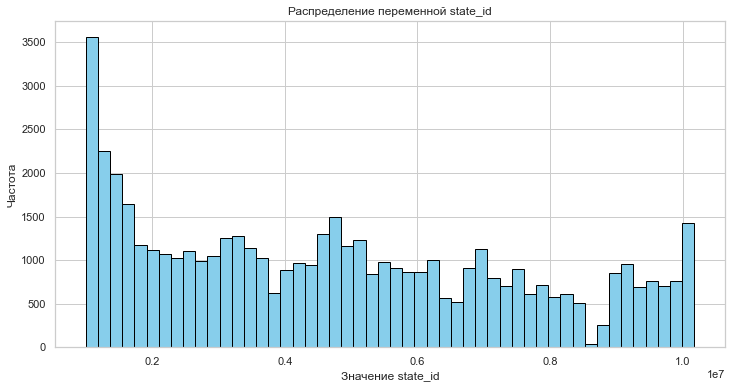

In [378]:
plt.figure(figsize=(12, 6))
plt.hist(df_cleaned['state_id'], bins=50, color='skyblue', edgecolor='black')

plt.title('Распределение переменной state_id')
plt.xlabel('Значение state_id')
plt.ylabel('Частота')

plt.show()

*Оценка распределения state_id показывает какие значения состояний встречаются чаще всего и как они распределены в датасете*

##### Корреляционная матрица между state_id и целевой переменной presence

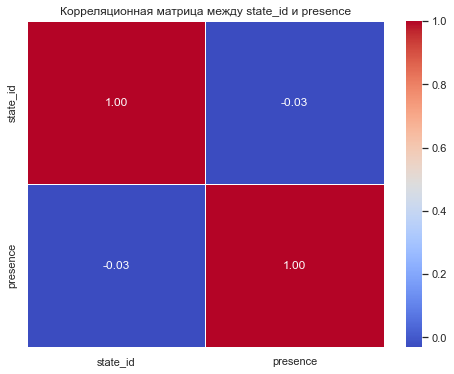

In [379]:
correlation_matrix = df_cleaned[['state_id', 'presence']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Корреляционная матрица между state_id и presence')
plt.show()

*В данном случае, отрицательное значение корелляции указывает на то, что при увеличении значения state_id склонность к нахождению в состоянии "home" (presence) не увеличивается линейно, и даже слабо уменьшается*

##### Рост значений state_id с течением времени

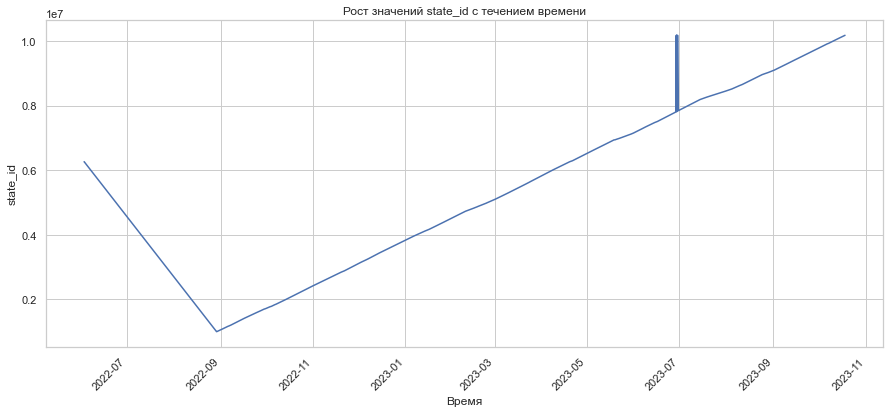

In [380]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='last_updated', y='state_id', data=df_cleaned)

plt.title('Рост значений state_id с течением времени')
plt.xlabel('Время')
plt.ylabel('state_id')
plt.xticks(rotation=45, ha='right')
plt.show()

*Вероятнее всего, резкое падение и рост значений state_id связаны с перезагрузкой/перепрошивкой системы "Умной кафедры", когда номера состояний сбрасывались*

##### Совместное распределение state_id и целевой переменной presence

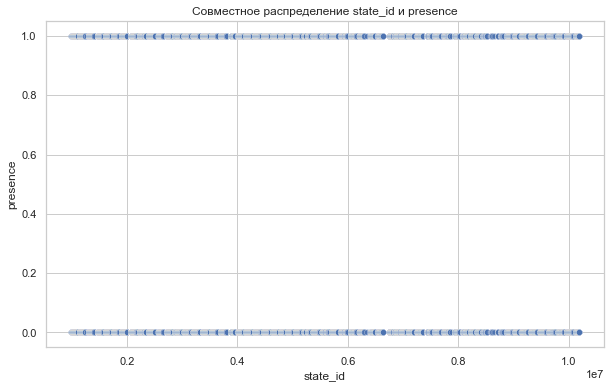

In [381]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='state_id', y='presence', data=df_cleaned, alpha=0.2)

plt.title('Совместное распределение state_id и presence')
plt.xlabel('state_id')
plt.ylabel('presence')
plt.show()

*Между state_id и presence существует нелинейная связь*

##### Совместное распределение state_id и old_state_id

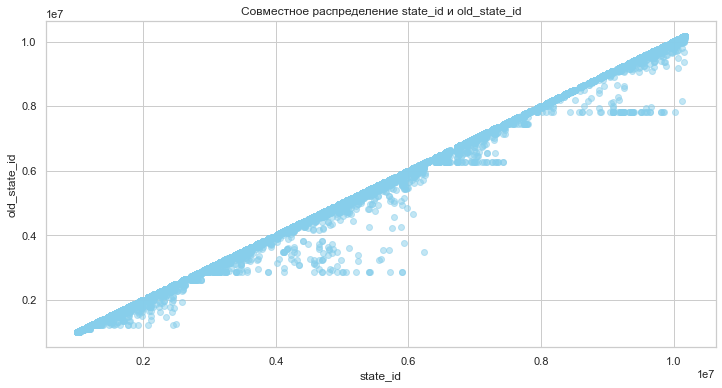

In [382]:
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned['state_id'], df_cleaned['old_state_id'], alpha=0.5, color='skyblue')
plt.title('Совместное распределение state_id и old_state_id')
plt.xlabel('state_id')
plt.ylabel('old_state_id')
plt.show()


*Между state_id и old_state_id существует линейная зависимость, однако, выбросы в сторону увеличения state_id могут указывают на аномальные изменения состояний, когда текущее состояние сильно отличается от предыдущего. Это может связано с резким изменением присутствия. Указывает на то, что некоторые люди, которые приходят на кафедру долгое время туда не возвращаются*

##### Совместное распределение state_id и old_state_id для 10 самых часто встречающихся устройств

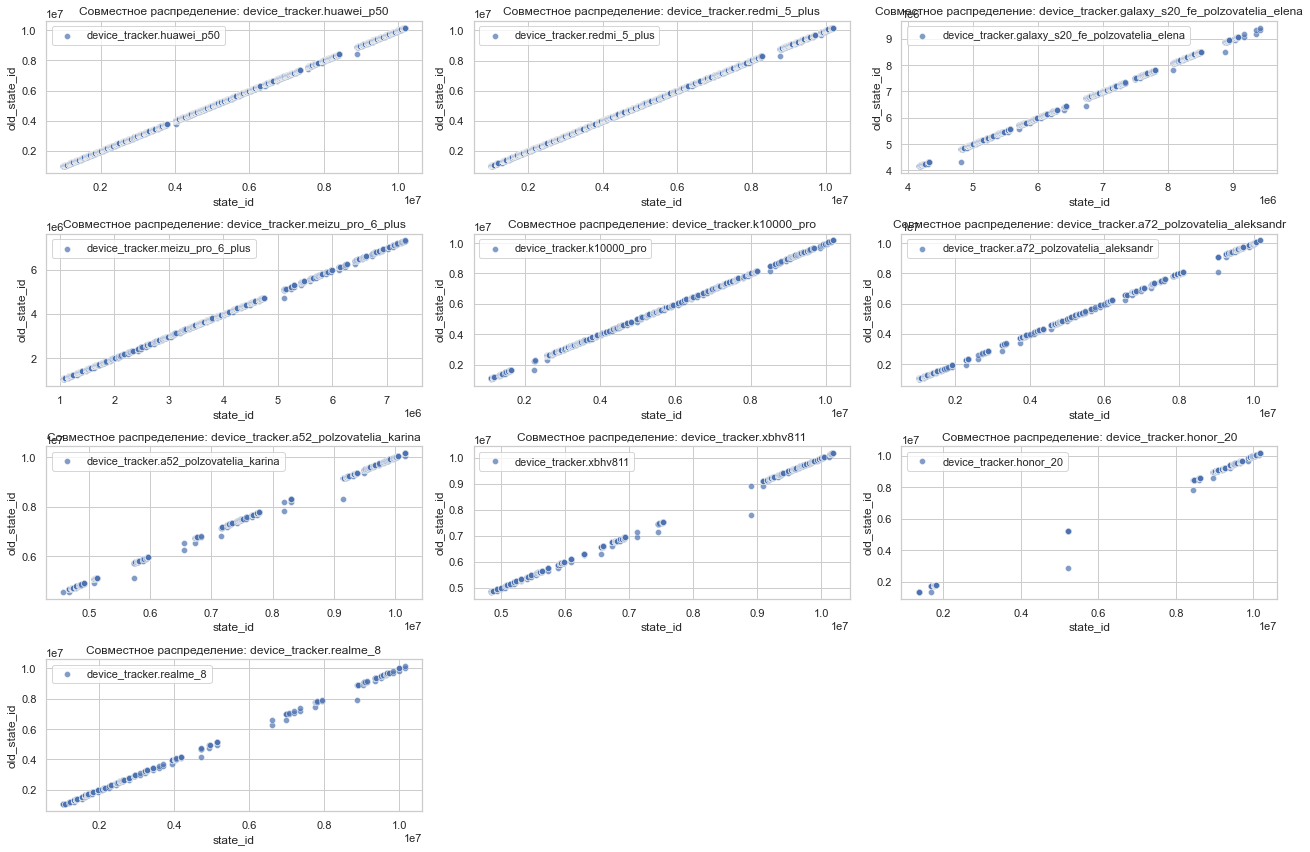

In [383]:
top_entity_ids = df_cleaned['entity_id'].value_counts().nlargest(10).index

plt.figure(figsize=(18, 12))
for i, entity_id in enumerate(top_entity_ids, 1):
    plt.subplot(4, 3, i)
    entity_data = df_cleaned[df_cleaned['entity_id'] == entity_id]
    sns.scatterplot(x='state_id', y='old_state_id', data=entity_data, alpha=0.7, label=entity_id)
    plt.title(f'Совместное распределение: {entity_id}')
    plt.xlabel('state_id')
    plt.ylabel('old_state_id')

plt.tight_layout()
plt.show()


*У 10 наиболее частво встречающихся устройств в базе данных, которые, вероятнее всего, принадлежат сотрудникам кафедры, диаграмма рассеяния показывает линейную зависимость, что говорит о том, что сотрудники не покидают кафедру надолго. В то же время наличие "выбросов" может указывать на выходные, отпуски и больничные*

#### entity_id

##### Распределение появления 10 самых часто встречающихся устройств

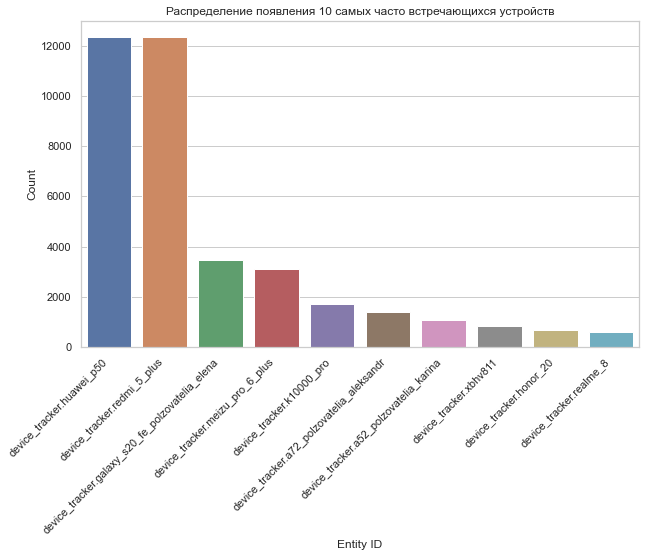

In [384]:
top_entity_ids = df_cleaned['entity_id'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_entity_ids.index, y=top_entity_ids.values)
plt.title('Распределение появления 10 самых часто встречающихся устройств')
plt.xlabel('Entity ID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


*Показывает, как часто каждое из 10 самых частых устройств встречается наборе данных. Два устройства находятся на кафедре наиболее часто. При этом, личное устройство заведующего кафедрой занимает 6 место.*

##### Распределение присутсвия и отсутствия для 10 наиболее частво встречающихся устройств

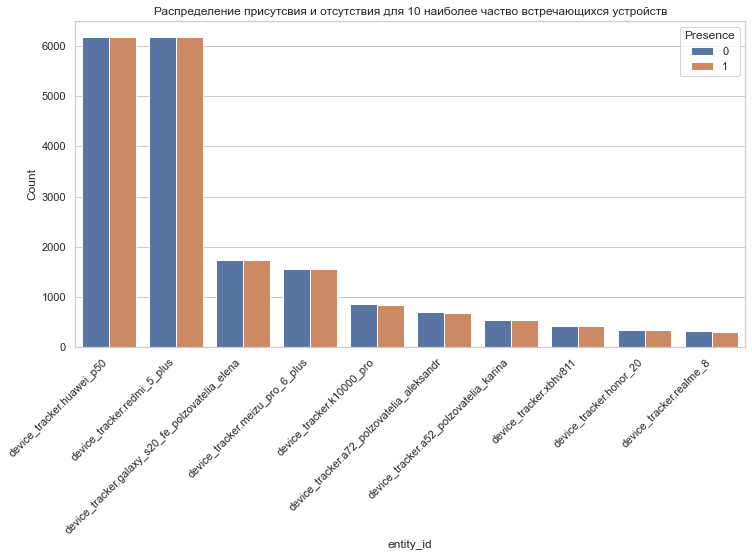

In [385]:
top_entities = df_cleaned['entity_id'].value_counts().head(10).index

df_top_entities = df_cleaned[df_cleaned['entity_id'].isin(top_entities)]

plt.figure(figsize=(12, 6))
sns.countplot(x='entity_id', hue='presence', order=top_entities, data=df_top_entities)
plt.title('Распределение присутсвия и отсутствия для 10 наиболее частво встречающихся устройств')
plt.xlabel('entity_id')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Presence')
plt.show()


*У наиболее часто встречающихся устройств на кафедре значения присутсвия (1) и отсутствия (0) практически точно совпадают*

##### Совместное распределение entity_id и presence для 10 самых часто встречающихся устройств

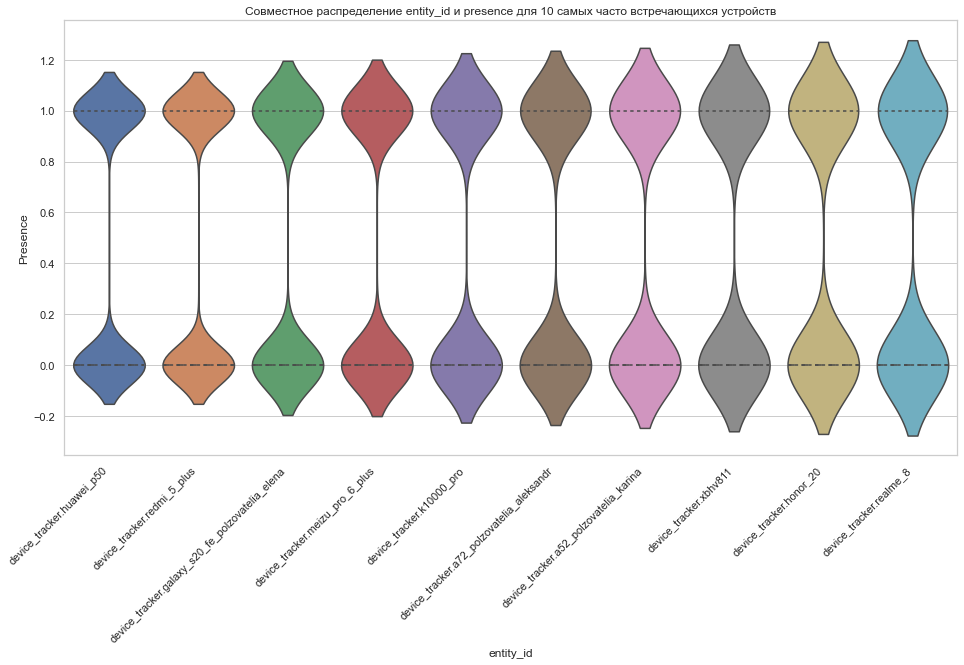

In [386]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='entity_id', y='presence', data=df_cleaned, order=top_entities, scale='width', inner='quartile')
plt.title('Совместное распределение entity_id и presence для 10 самых часто встречающихся устройств')
plt.xlabel('entity_id')
plt.ylabel('Presence')
plt.xticks(rotation=45, ha='right')
plt.show()


*График дает представление о том, как часто каждое устройство находится в состоянии присутствия и отсутствия. На этом графике также видно, что эти значения практически точно совпадают*

##### Количество уникальных устройств по месяцам

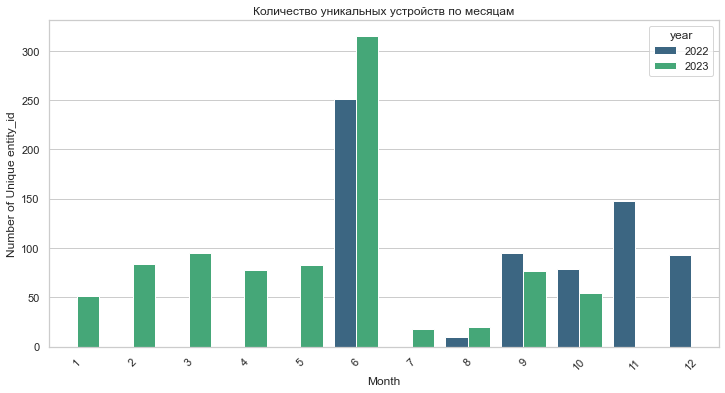

In [387]:
monthly_entity_counts = df_cleaned.groupby(['year', 'month'])['entity_id'].nunique().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='entity_id', hue='year', data=monthly_entity_counts, palette='viridis')
plt.title('Количество уникальных устройств по месяцам')
plt.xlabel('Month')
plt.ylabel('Number of Unique entity_id')
plt.xticks(rotation=45)
plt.show()

*Аномальное повышение количества новых посетителей кафедры в июне может быть связано с проведением профориентационной деятельности или другими мероприятиями, проводимыми кафедрой. При этом аномальное понижение или даже полное отсутсвие людей на кафедре связано с летними каникулами и отсутствием занятий у студентов*

#### state

##### Распределение состояний state

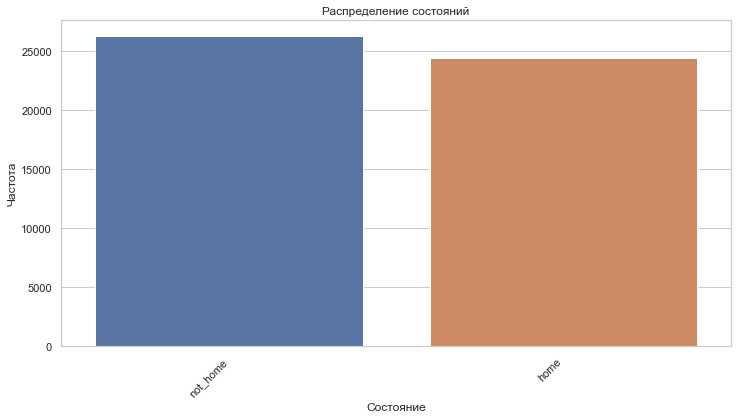

In [388]:
state_counts = df_cleaned['state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values)

plt.title('Распределение состояний')
plt.xlabel('Состояние')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')
plt.show()

*Большая частота состояния not_home указывает на то, что некоторые устройства посещают кафедру единожды* 

##### Общее количество устройств в стостоянии home по времени дня

C:\Users\phili\AppData\Local\Temp/ipykernel_1120/1714969064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_devices_data['hour'] = home_devices_data['last_updated'].dt.hour


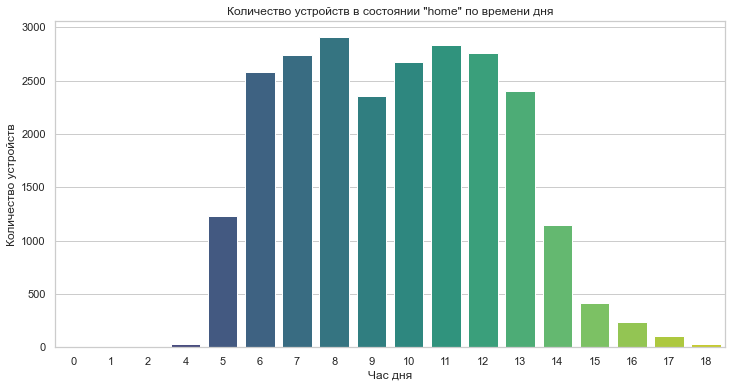

In [389]:
home_devices_data = df_cleaned[df_cleaned['state'] == 'home']

home_devices_data['hour'] = home_devices_data['last_updated'].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=home_devices_data, palette='viridis')

plt.title('Количество устройств в состоянии "home" по времени дня')
plt.xlabel('Час дня')
plt.ylabel('Количество устройств')
plt.show()


*Наибольшее количество устройств, хоть раз присутствовавшее на кафедре, было там в 8 часов утра. При этом, довольно большое число устройств было на кафедре и в 5 и в 6 часов утра. Это может быть связано с погрешностями или неправильной настройкой часового пояса в Home Assistant*

##### Совместное распределение между state и presence

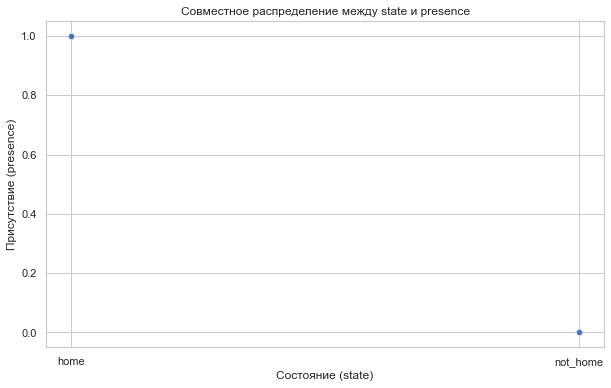

In [390]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='state', y='presence', data=df_cleaned)

plt.title('Совместное распределение между state и presence')
plt.xlabel('Состояние (state)')
plt.ylabel('Присутствие (presence)')

plt.show()

*Очевидно именно такое распределение, так как по сути переменные state и presence представляют собой одно и то же*

#### last_updated

##### Распределение времени обновлений

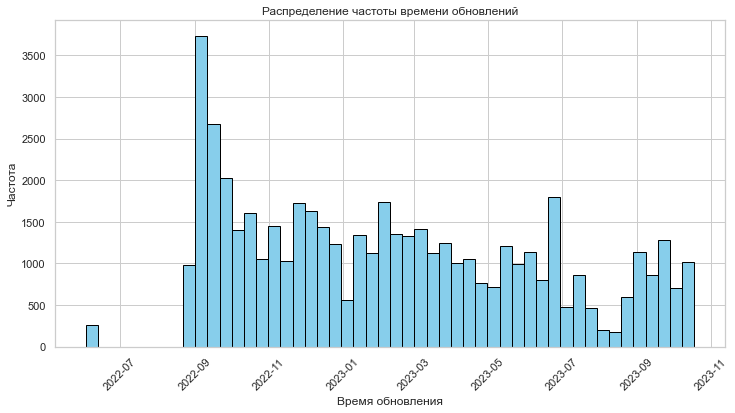

In [391]:
plt.figure(figsize=(12, 6))
df_cleaned['last_updated'].hist(bins=50, color='skyblue', edgecolor='black')

plt.title('Распределение частоты времени обновлений')
plt.xlabel('Время обновления')
plt.ylabel('Частота')
plt.xticks(rotation=45)

plt.show()

*Наибольшее число обновления состояний наблюдается в начале сентября 2022 года. При этом, система была отключена с середины июля 2022 года. Возможно, такое аномальное изменение состояний связано с тестированием системы*

##### Количество обновлений состояний в течение времени

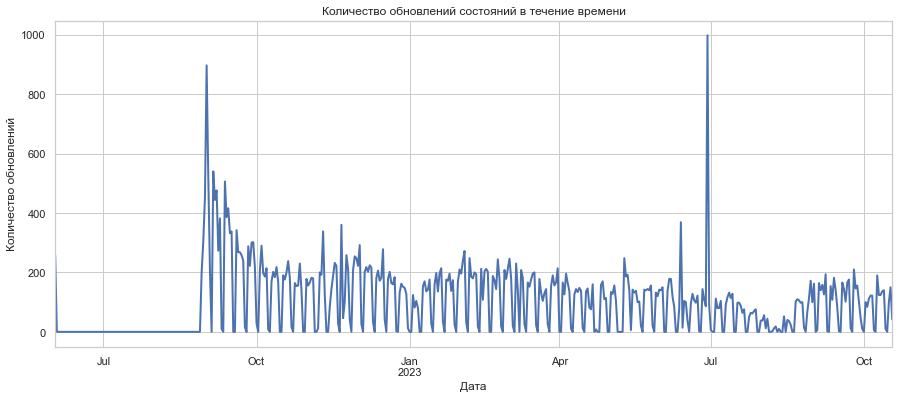

In [392]:
time_series = df_cleaned.resample('D', on='last_updated').size()

plt.figure(figsize=(15, 6))
time_series.plot(lw=2)

plt.title('Количество обновлений состояний в течение времени')
plt.xlabel('Дата')
plt.ylabel('Количество обновлений')

plt.show()

*Количество обновлений значительно уменьшается в летнее время. При этом наибольшая активнось наблюдается в периоды сессий, а наименьшая - в периоды каникул*

##### Распределение активности устройств по дням недели и времени суток

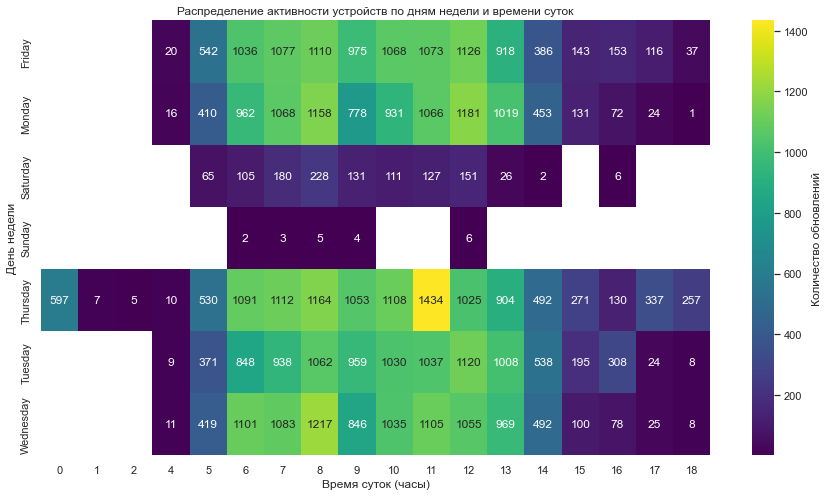

In [393]:
df_days_heatmap = df_cleaned.copy()

df_days_heatmap['weekday'] = df_days_heatmap['last_updated'].dt.day_name()
df_days_heatmap['hour'] = df_days_heatmap['last_updated'].dt.hour

plt.figure(figsize=(15, 8))
heatmap_data = df_days_heatmap.groupby(['weekday', 'hour'])['entity_id'].size().unstack()
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Количество обновлений'})

plt.title('Распределение активности устройств по дням недели и времени суток')
plt.xlabel('Время суток (часы)')
plt.ylabel('День недели')

plt.show()

*Как видно, наименьшее количество событий происходит по выходным дням. Самый активный день - четверг в 11 часов утра*

##### Распределение состояний устройств по дням недели

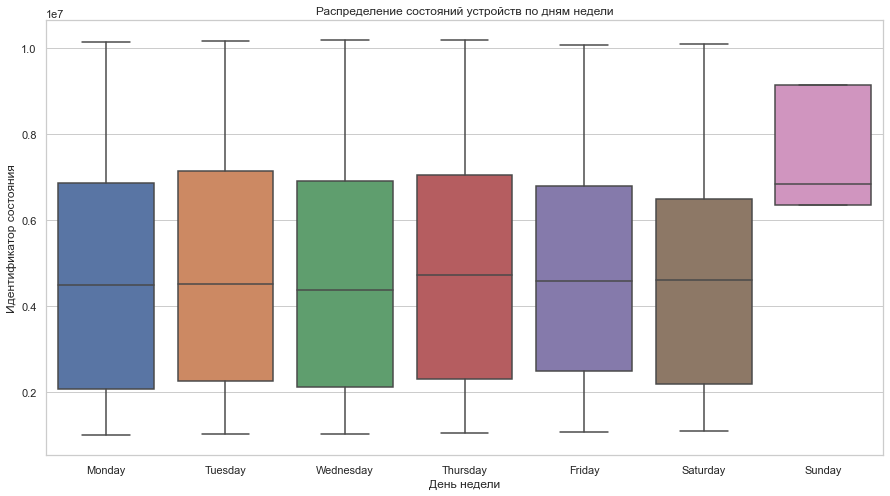

In [394]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='weekday', y='state_id', data=df_days_heatmap)

plt.title('Распределение состояний устройств по дням недели')
plt.xlabel('День недели')
plt.ylabel('Идентификатор состояния')

plt.show()

*График показывает центральную тенденцию, разброс и наличие выбросов в распределении идентификаторов состояний устройств для каждого дня недели*

##### Совместное распределение last_updated и целевой переменной presence

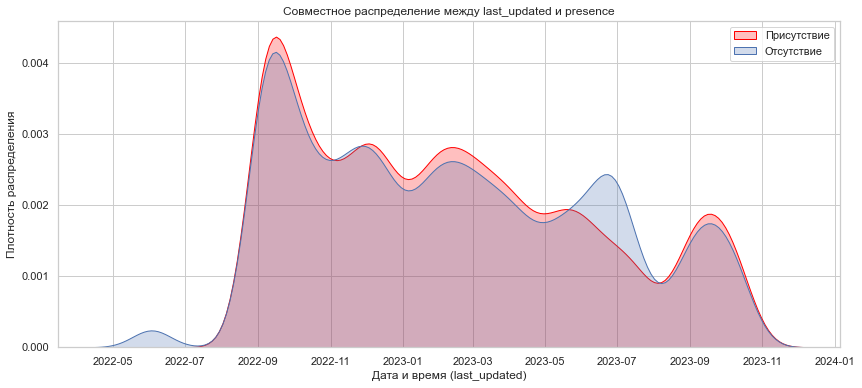

In [395]:
presence_timeseries = df_cleaned[df_cleaned['presence'] == 1]['last_updated']
absence_timeseries = df_cleaned[df_cleaned['presence'] == 0]['last_updated']

plt.figure(figsize=(14, 6))
sns.kdeplot(presence_timeseries, label='Присутствие', fill=True, color="red")
sns.kdeplot(absence_timeseries, label='Отсутствие', fill=True)

plt.title('Совместное распределение между last_updated и presence')
plt.xlabel('Дата и время (last_updated)')
plt.ylabel('Плотность распределения')

plt.legend()
plt.show()

*График демонстрирует, как меняется плотность присутствия и отсутствия устройств в зависимости от времени. Высокие пики указывают на периоды, когда устройства чаще находятся в данном состоянии*

#### old_state_id   

##### Корреляционная матрица между old_state_id и целевой переменной presence

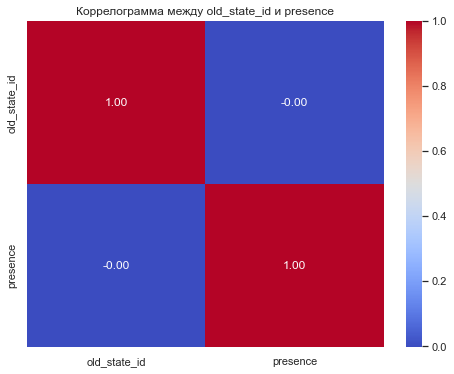

In [396]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[['old_state_id', 'presence']].corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Коррелограмма между old_state_id и presence')
plt.show()

*Этот график показывает, что old_state_id никак не коррелирует с целевой переменной presence*

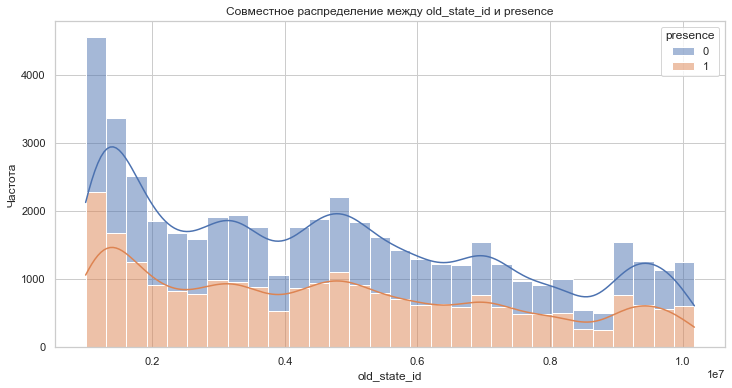

In [397]:
presence_old_state = df_cleaned[['old_state_id', 'presence']]

plt.figure(figsize=(12, 6))
sns.histplot(data=presence_old_state, x='old_state_id', hue='presence', multiple='stack', bins=30, kde=True)

plt.title('Совместное распределение между old_state_id и presence')
plt.xlabel('old_state_id')
plt.ylabel('Частота')

plt.show()

*График показывает распределение old_state_id при присутствии (presence=1) и распределение old_state_id при отсутствии (presence=0)*

#### Коррелированные признаки

##### Корреляционная матрица числовых признаков

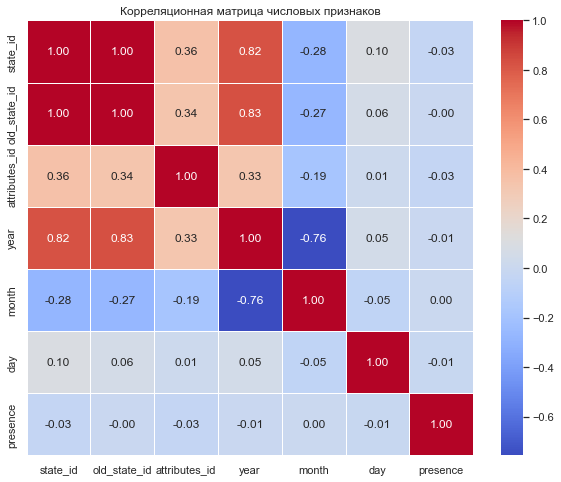

In [398]:
numeric_columns = ['state_id', 'old_state_id', 'attributes_id', 'year', 'month', 'day', 'presence']

correlation_matrix = df_cleaned[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Корреляционная матрица числовых признаков')
plt.show()

*Наиболее сильно между собой коррелируют year (год) и state_id/old_state_id*

#### Бесполезные признаки

*Бесполезными оказались attributes_id и context_id. Сами по себе они не несут никакой информации. Основная причина - отсутствие влияния. Эти признаки не содержат достаточной информации для предсказания целевой переменной (presence). attributes_id служит связью с другой таблицей исходной базы данных, context_id не несет смысла без заполнения полей context_user_id и context_parent_id, которые в исходной базе оказались заполненными нулевыми значениями*

### Вывод

В результате анализа были выявлены аномалии, тенденции и закономерности в присутствии сотрудников и других посетителей кафедры. Были выявлены неточности (некоторые устройства замечены на кафедре в раннее время, до начала рабочего дня). Были выявлены недостатки, например, устройства сотрудников кафедры никак не помечены в базе данных Home Assistant, что делает невозможным точный анализ присутствия сотрудников на кафедре. Однако, уделось выяснить, например, что наиболее часто кафедру посещают в четверг. Обобщая периоды, кафедру наиболее часто посещают в период летней сессии, а наименьшее количество посещений наблюдается во время летних каникул.

Подводя итог о присутствии сотрудников на кафедре, можно выявить одинаковые закономерности. Большенсвто сотрудников посещают кафедру согласно графика, а длительные отсутствия не являются частым явлением, и, почти наверняка, связаны с выходными днями, отпусками, больничными, работой университета по установке контактов с зарубежными учебными заведениями.

Таким образом, было продемонстрировано владение основными инструментальными средствами библиотек языка программирования Python, методами и приемами подготовительного и описательного анализа данных, средствами визуализации данных, использования и усовершенствования обучаемых моделей, умение делать выводы из проведенного анализа.